<a href="https://colab.research.google.com/github/SampadSikder/Nonnegative-Matrix-Factorization-Experimentation/blob/main/AT%26T_with_and_without_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equations from https://proceedings.neurips.cc/paper/2000/file/f9d1152547c0bde01830b7e8bd60024c-Paper.pdf
Edges after nmf in basis matrix: http://www.cs.cmu.edu/~./changbo/publications/IJPRAI05.pdf

In [30]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
import numpy
import matplotlib.pyplot as mtp

In [31]:
from google.colab import drive
drive.mount('/content/Drive')

KeyboardInterrupt: ignored

# Code Library

In [32]:
import time

def extractFrameFromImage(filePath, imageLimit, frame_rate):
  vidcap = cv2.VideoCapture(filePath)
  success,image = vidcap.read()
  count = 0
  #define framerate
  frame_rate = 10
  prev = 0
  frame=0
  while success:
    time_elapsed = time.time() - prev
    success,image = vidcap.read()  
    if time_elapsed > 1./frame_rate:
      prev = time.time()
      cv2.imwrite("%d.jpg" % count, image)     # save frame as JPEG file      
      #print('Read a new frame: ', success)
      count=count+1
      frame += frame_rate # i.e. at 30 fps, this advances one second
      vidcap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    if count>=imageLimit:
      break
  vidcap.release()
  cv2.destroyAllWindows()

  

In [33]:
def checkCrop():
  img=cv2.imread('/content/9.jpg')
  img=img[350:600,400:600]
  cv2_imshow(img)

In [34]:
import os
def countWidthandHeight():
  img=cv2.imread('/content/9.jpg')
  
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #resize
  
  width = int(image.shape[1]/7)
  
  height = int(image.shape[0]/7)
  
  print(width, height)

  


  count=0

  for image_name in os.listdir('/content'):
    extension = os.path.splitext(image_name)[1][1:]
    if extension=='jpg':
      count=count+1

  return width, height, count

In [44]:
def singleImage(path):
  img=cv2.imread(path)
  
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #resize
  
  width = int(image.shape[1])
  
  height = int(image.shape[0])


  dim = (width, height)
  print(width, height)
  #resizing image
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

  return image, width, height

In [36]:
def multiplyImage():
  img=cv2.imread('/content/9.jpg')
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #resize
  imageT=np.transpose(image)
  result=np.matmul(image,imageT)

  cv2_imshow(result)


In [37]:


def convertAllImageToMatrix(width, height, x): # x = number of images
  
 

  y = width*height 

  m = np.zeros(shape=(x, int(y)))
  print(m.shape)
  itr = 0
  name_list = []
  for image_name in os.listdir('/content'):
    extension = os.path.splitext(image_name)[1][1:]
    if extension=='jpg':
      image_path='/content/'+image_name
      image = cv2.imread(image_path)
      #####flip image
      #image=cv2.flip(image,0)
      #crop image
      #img=image[350:600,400:600]
      #grayscale	
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      #resize
      dim = (width, height)
      print(width, height)
      #resizing image
      resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
      #rows,cols = resized.shape # gives dimensions for RGB array
      
      rows,cols=resized.shape#normal shape
      img_size = rows*cols
      img_1D_vector = resized.reshape(img_size)
      
      #print(img_1D_vector)
      #np.append(m, img_1D_vector,axis=0)
      m[itr]=img_1D_vector
      itr=itr+1
      name_list.append(image_name)
      print(itr)
      
  return m, name_list, itr

In [38]:
def normalizeM(m):
  sum=0
  row, col=m.shape
  for i in range(0,row):
    for j in range(0,col):
      sum+=m[i][j]
  mean=sum/row*col 

  m=m/mean

  return m, mean

In [39]:
def updateW(x,w,h):
  #XVT
  ht=np.transpose(h)
  numerator=np.matmul(x,ht)
  #UVVT
  den1=np.matmul(w,h)
  denominator=np.matmul(den1,ht)

  #return
  print('u')
  secondPart=np.divide(numerator,denominator)
  return np.multiply(w,secondPart)

In [40]:
def updateH(x,w,h):
  #UT*X
  wt=np.transpose(w)
  numerator=np.matmul(wt,x)
  #UTUV
  den1=np.matmul(w,h)
  denominator=np.matmul(wt,den1)
  
  #update return
  print('v')
  secondPart=np.divide(numerator,denominator)
  return np.multiply(h,secondPart)

In [41]:
def performNMF(x, featureNo, imageCount, EPSILON=1e-9):
  w=abs(np.random.normal(3,2.5,size=(imageCount,featureNo)))
  h=abs(np.random.normal(3,2.5,size=(featureNo, x.shape[1])))

  print("Shape of W: "+str(w.shape))
  print("Shape of H: "+str(h.shape))

  itr=0
  cost=np.linalg.norm(x-np.matmul(w,h))
  while cost>EPSILON:
    if itr%2==0:
      h=updateH(x,w,h)
      #h*=6
    else:
      w=updateW(x,w,h)
      #w/=4
    wh=np.matmul(w,h)
    print(w,h)
    cost=np.linalg.norm(x-wh)
    print(cost)
    if itr>=100:
      break
    itr=itr+1
  return w,h

In [57]:
def getImageListFromM(x_new):
  #print(height,width)
  images = []
  for row in x_new:
    img_data = []
    for i in range(height):
      img_row = []
      for j in range(width):
        img_row.append(row[i*width + j])
      img_data.append(img_row)
    images.append(img_data)
  return images

In [64]:
def convertMatrixToImage(x,mean):
  x_new=np.zeros((x.shape[0],x.shape[1]), dtype=int)
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x_new[i][j]=x[i,j]*mean
      x_new[i][j]=math.ceil(x_new[i][j])
  print(x_new)
  return x_new

### Testing Code

In [56]:
from google.colab.patches import cv2_imshow


In [58]:
def compareAndTest(m, w, h, mean):
  x_new=np.matmul(w,h)
  x_new=np.ceil(x_new*mean)
  #x_new=np.transpose(x_new)

  resulting_images = getImageListFromM(x_new)
  original_images = getImageListFromM(np.ceil(m*mean))

  for index in range(m.shape[0]):
    print("-------------------------------Number of image: "+str(index))

    img=np.array(resulting_images[index])
    cv2_imshow(img)
    print("Image after NMF:")

    img=np.array(original_images[index])
    cv2_imshow(img)
    print("Image Before NMF:")


In [59]:
def variance(m): # m = matrix of all images
  return np.var(m)

In [60]:
def __grouper(labels, original_images, resulting_images):
    groups = []
    for current_label in set(labels):
      cluster = []
      for index,label in enumerate(labels):
        if label == current_label:
          node = [label, original_images[index], resulting_images[index]]
          cluster.append(node)
      groups.append(cluster)
    return groups

In [61]:
def compareAndTestWithKNN(m, w, h, mean, n_clusters):
  x_new=np.matmul(w,h)
  x_new=np.ceil(x_new*mean)
  #x_new=np.transpose(x_new)

  kmeans = KMeans(n_clusters, random_state=0)
  kmeans.fit(w)

  resulting_images = getImageListFromM(x_new)
  original_images = getImageListFromM(np.ceil(m*mean))
  
  clusters = __grouper(kmeans.labels_, original_images, resulting_images)

  for cluster in clusters:
    print("----------------Labels------------------------")
    for index, node in enumerate(cluster):
      print("-------------------------------Number of image: "+str(index)+"-----------Cluster="+str(node[0])+".")
      img=np.array(node[1])
      cv2_imshow(img)
  
  return kmeans

In [62]:
def scatterPlot(kmeans,F):
  y_predict= kmeans.fit_predict(F)  
  mtp.scatter(F[y_predict == 0, 0], F[y_predict == 0, 1], s = 10, c = 'blue', label = 'Cluster 1') #for first cluster  
  mtp.scatter(F[y_predict == 1, 0], F[y_predict == 1, 1], s = 10, c = 'green', label = 'Cluster 2') #for second cluster  
  mtp.scatter(F[y_predict== 2, 0], F[y_predict == 2, 1], s = 10, c = 'red', label = 'Cluster 3') #for third cluster  
  mtp.scatter(F[y_predict == 3, 0], F[y_predict == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
  mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroid')   
  mtp.title('Clusters')  

  mtp.legend()  
  mtp.show() 

# Experimentation Area

In [ ]:
imageLimit = 100
frame_rate=5
extractFrameFromImage('/content/Drive/MyDrive/Colab Notebooks/Dataset/ClothStackDetection.mp4', imageLimit, frame_rate)

In [ ]:
!ls

In [ ]:
width, height, imageCount=countWidthandHeight()

In [ ]:
print(imageCount)

In [ ]:
m, imageNameList, imageCount = convertAllImageToMatrix(width, height, imageCount)


In [ ]:
m.shape

In [ ]:
m

In [ ]:
m, mean = normalizeM(m)

In [ ]:
w,h=performNMF(m, 10, imageCount)

# from sklearn.decomposition import NMF
# nmf_model = NMF(10,max_iter=100)
# w = nmf_model.fit_transform(m)
# h=nmf_model.components_


In [ ]:
compareAndTest(m,w,h, mean)

In [ ]:
x_new=np.matmul(w,h)
x_new=np.ceil(x_new*mean)
x_new=np.transpose(x_new)

print("Original Image Set Variance: "+str(variance(np.ceil(np.transpose(m)*mean))))
print("NMF Generated Image Set Variance: "+str(variance(x_new)))

In [ ]:
w.shape

# Clustering

In [ ]:
kmeans=compareAndTestWithKNN(m,w,h, mean, 3)

In [ ]:
scatterPlot(kmeans,w)

#Visualization


In [ ]:
m,width,height=singleImage('/content/8.jpg')
print(width,height)

#multiplyImage()

In [ ]:
#m,mean=normalizeM(m)
print(m)
w,h=performNMF(m, 10, height)
print(m)
'''
from sklearn.decomposition import NMF
nmf_model = NMF(100,max_iter=100)
w = nmf_model.fit_transform(m)
h=nmf_model.components_
'''

In [ ]:
import math
m=m
cv2_imshow(m)
#cv2_imshow(convertMatrixToImage(np.matmul(w,h),mean))
cv2_imshow(np.matmul(w,h))

In [ ]:
#cv2_imshow(convertMatrixToImage(w,mean))
cv2_imshow(np.ceil(w))
print(np.ceil(w))

In [ ]:
#cv2_imshow(convertMatrixToImage(h,mean))
print(w.shape)
col=np.transpose(w)
temp=col[0].reshape(11,23)
print(temp)
cv2_imshow(temp)

In [ ]:
cv2_imshow(np.matmul(w,h))

#Temp

In [ ]:
!git clone https://github.com/alpha-13/Face-Recognition.git

In [ ]:
cd /content/Face-Recognition/Datasets/att_faces/Training/s1

In [ ]:
pwd

In [ ]:
!find -name "*pgm" | xargs -I {} convert {} {}.png

In [ ]:
ls

In [50]:
m,width,height=singleImage('/content/Face-Recognition/Datasets/att_faces/Training/s1/9.pgm')

92 112


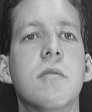

In [51]:
cv2_imshow(m)

In [ ]:
print(m)
w,h=performNMF(m, 10, height)
print(m)

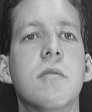

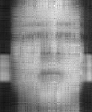

In [53]:
import math
m=m
cv2_imshow(m)
#cv2_imshow(convertMatrixToImage(np.matmul(w,h),mean))
cv2_imshow(np.matmul(w,h))

In [ ]:
m,mean=normalizeM(m)
w,h=performNMF(m, 10, height)
print(m)

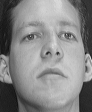

[[41 42 44 ... 49 53 53]
 [42 40 42 ... 47 52 54]
 [41 42 42 ... 48 52 51]
 ...
 [32 32 28 ... 40 39 40]
 [36 35 28 ... 41 42 41]
 [36 35 29 ... 42 42 42]]


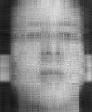

In [65]:
import math
cv2_imshow(m*mean)
cv2_imshow(convertMatrixToImage(np.matmul(w,h),mean))